In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer  
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import IterativeImputer

In [6]:
steam1 = pd.read_csv('steam1.csv')
steam2 = pd.read_csv('steam2.csv')
steam4 = pd.read_csv('steam4.csv')
steam5 = pd.read_csv('steam5.csv')
s1 = pd.read_csv('s1.csv')

In [3]:
steam1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7325 entries, 0 to 7324
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7325 non-null   object 
 1   price         7325 non-null   float64
 2   release_date  7325 non-null   object 
 3   review_no     7325 non-null   float64
 4   review_type   7325 non-null   object 
 5   tags          7325 non-null   object 
 6   description   7325 non-null   object 
 7   Release_date  7325 non-null   object 
dtypes: float64(2), object(6)
memory usage: 457.9+ KB


In [4]:
steam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1497 non-null   object 
 1   releasedate     1497 non-null   object 
 2   copiessold      1497 non-null   int64  
 3   price           1497 non-null   float64
 4   revenue         1497 non-null   float64
 5   avgplaytime     1497 non-null   float64
 6   reviewscore     1497 non-null   int64  
 7   publisherclass  1497 non-null   object 
 8   publishers      1497 non-null   object 
 9   developers      1497 non-null   object 
 10  steamid         1497 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 128.8+ KB


In [5]:
steam4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game_name  672 non-null    object
 1   genre      672 non-null    object
 2   rank_type  672 non-null    object
 3   rank       672 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.1+ KB


In [6]:
steam5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   name                                     277 non-null    object
 1   short_description                        277 non-null    object
 2   long_description                         277 non-null    object
 3   genres                                   277 non-null    object
 4   minimum_system_requirement               277 non-null    object
 5   recommend_system_requirement             277 non-null    object
 6   release_date                             277 non-null    object
 7   developer                                277 non-null    object
 8   publisher                                277 non-null    object
 9   overall_player_rating                    277 non-null    object
 10  number_of_reviews_from_purchased_people  277 non-null    objec

In [7]:
s1 = pd.read_csv('s1.csv')
s2 = pd.read_csv('s2.csv')

In [8]:
label_encoder = LabelEncoder()
s1['publisherclass_encoded'] = label_encoder.fit_transform(s1['publisherclass'])

In [12]:
s1['tags'] = s1['tags'].fillna('')

s1['tag_list'] = s1['tags'].str.split(',')

s1['tag_list'] = s1['tag_list'].apply(lambda x: [tag.strip() for tag in x])

mlb = MultiLabelBinarizer()
tag_dummies = pd.DataFrame(mlb.fit_transform(s1['tag_list']), columns=mlb.classes_, index=s1.index)

s1_encoded = pd.concat([s1, tag_dummies], axis=1)

In [9]:
genre_dummies = pd.get_dummies(steam4['genre'], prefix='genre')
steam4_encoded = pd.concat([steam4, genre_dummies], axis=1)

In [16]:
steam1.columns = steam1.columns.str.lower()

In [17]:
steam1.isnull().sum()

name              0
price            51
release_date     19
review_no        47
review_type      47
tags              0
description     426
dtype: int64

In [20]:
steam1['Release_date'] = pd.to_datetime(steam1['release_date'], format='%Y-%m-%d', errors='coerce')

In [21]:
numerical_steam1 = steam1.select_dtypes(include=['float64', 'int64']).columns

In [29]:
steam1.isnull().sum()

name              0
price             0
release_date     19
review_no         0
review_type      47
tags              0
description     426
Release_date     19
dtype: int64

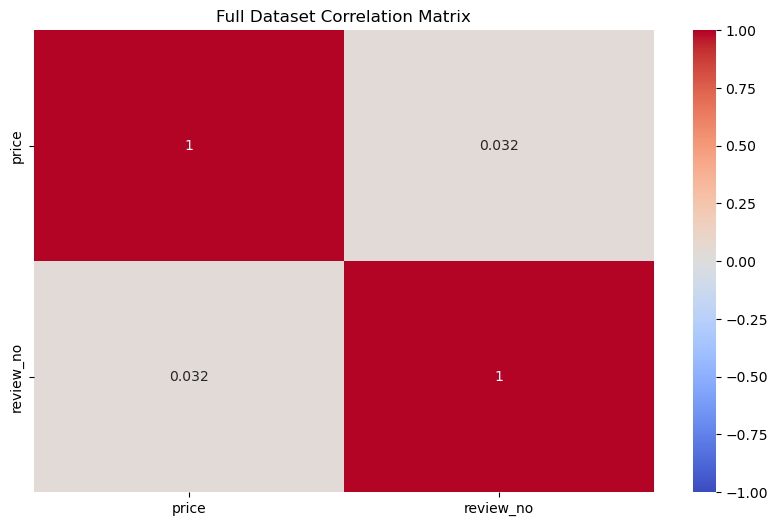

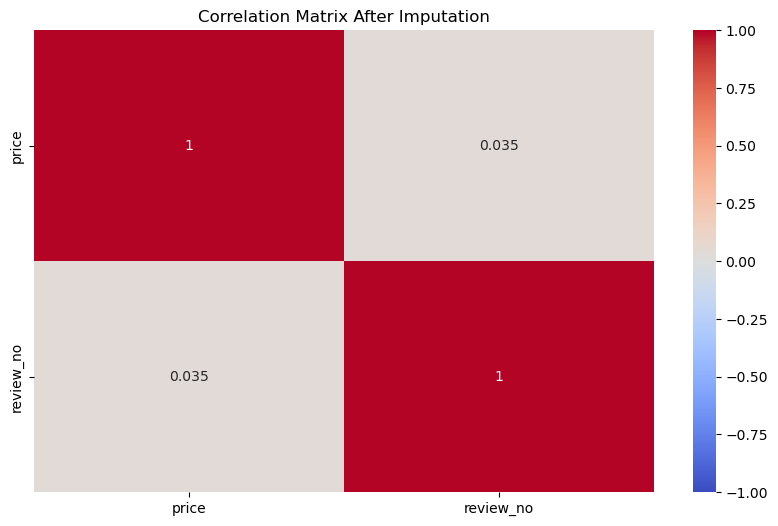

In [54]:
def plot_heatmap(dataframe, title):
    numerical_steam1 = dataframe.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(10, 6))
    sns.heatmap(numerical_steam1.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

plot_heatmap(steam1, "Full Dataset Correlation Matrix")

numerical_steam1 = steam1_missing.select_dtypes(include=['float64', 'int64']).columns

mice_imputer = IterativeImputer(max_iter=10, random_state=0)
steam1_missing[numerical_steam1] = mice_imputer.fit_transform(steam1_missing[numerical_steam1])

plot_heatmap(steam1_missing, "Correlation Matrix After Imputation")

In [38]:
steam1.dropna(inplace=True)

In [39]:
steam1.isnull().sum()

name            0
price           0
release_date    0
review_no       0
review_type     0
tags            0
description     0
Release_date    0
dtype: int64

In [40]:
steam1.to_csv('steam1.csv', index=False)

In [31]:
steam2.columns = steam2.columns.str.lower()
steam2.isnull().sum()

name              0
releasedate       0
copiessold        0
price             0
revenue           0
avgplaytime       0
reviewscore       0
publisherclass    0
publishers        1
developers        2
steamid           0
dtype: int64

In [32]:
steam2.dropna(inplace=True)

In [33]:
steam2.to_csv('steam2.csv', index=False)

In [42]:
steam4.columns = steam4.columns.str.lower()
steam4.isnull().sum()

game_name    0
genre        0
rank_type    0
rank         0
dtype: int64

In [43]:
steam5.columns = steam5.columns.str.lower()
steam5.isnull().sum()

name                                        0
short_description                          13
long_description                            0
genres                                      0
minimum_system_requirement                  0
recommend_system_requirement                0
release_date                                0
developer                                   0
publisher                                   0
overall_player_rating                       0
number_of_reviews_from_purchased_people     0
number_of_english_reviews                   0
link                                        0
dtype: int64

In [44]:
steam5.dropna(inplace=True)

In [46]:
steam5.to_csv('steam5.csv', index=False)

In [49]:
steam3 = pd.read_csv('steam3.csv', low_memory=False)

In [50]:
steam3.isnull().sum()

review            503
hours_played        0
helpful             0
funny               0
recommendation      0
date                0
game_name           0
username           81
dtype: int64

In [51]:
steam3.dropna(inplace=True)

In [53]:
steam3.to_csv('steam3.csv', index=False)

In [55]:
steam1.head()

,name,price,release_date,review_no,review_type,tags,description,Release_date
0,Black Myth: Wukong,59.990000,2024-08-20,574097.0,Overwhelmingly Positive,"Mythology,Action RPG,Action,Souls-like,RPG,Com...",Black Myth: Wukong is an action RPG rooted in ...,2024-08-20
1,"Warhammer 40,000: Space Marine 2",8.102391,2024-09-09,23591.0,Very Positive,"Warhammer 40K,Action,Adventure,Third-Person Sh...",Embody the superhuman skill and brutality of a...,2024-09-09
2,Counter-Strike 2,0.000000,2012-08-21,8286153.0,Very Positive,"FPS,Shooter,Multiplayer,Competitive,Action,Tea...","For over two decades, Counter-Strike has offer...",2012-08-21
4,Grand Theft Auto V,10.480000,2015-04-14,1703156.0,Very Positive,"Open World,Action,Multiplayer,Crime,Automobile...",Grand Theft Auto V for PC offers players the o...,2015-04-14
5,Red Dead Redemption 2,17.990000,2019-12-05,565716.0,Very Positive,"Open World,Story Rich,Western,Adventure,Multip...",Winner of over 175 Game of the Year Awards and...,2019-12-05


In [56]:
steam2.head()

,name,releasedate,copiessold,price,revenue,avgplaytime,reviewscore,publisherclass,publishers,developers,steamid
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [57]:
steam3.head()

,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,"1,152",13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account


In [58]:
steam4.head()

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2
2,Cyberpunk 2077,Action,Sales,3
3,Black Myth: Wukong,Action,Sales,4
4,ELDEN RING,Action,Sales,5


In [59]:
steam5.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


In [5]:
s1.head()

,name,price_x,release_date,review_no,review_type,tags,description,Release_date,releasedate,copiessold,price_y,revenue,avgplaytime,reviewscore,publisherclass,publishers,developers,steamid
0,Wanba Warriors,2.99,2020-03-26,2210.0,Very Positive,"Fighting,Multiplayer,Funny,Parody ,PvP,Local M...",Have you got what it takes to be a Wanba Warri...,2020-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#BLUD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-06-2024,5557.0,24.99,117246.0,6.316958,76.0,AA,Humble Games,Exit 73 Studios,1921480.0
2,.hack//G.U. Last Recode,49.99,2017-11-03,2993.0,Very Positive,"RPG,JRPG,Anime,Singleplayer,Story Rich,Action ...",.hack//G.U. is back!\n\nThis collection includ...,2017-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 Million Zombies,2.74,2023-12-10,22.0,Positive,"Action,Casual,Vehicular Combat,Singleplayer,Ar...",1 Million Zombies is a casual arcade inspired ...,2023-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 to 1 humanoid edible toys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-08-2024,21002.0,7.99,140013.0,2.411043,95.0,Indie,无,"汉谟拉比炒面,我的屁是香哒",2976720.0


In [11]:
s2.head()

,game_name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link,genre,rank_type,rank
0,69 Balls,A Third-Person shooting game but you are not a...,About This Game\nA Third-Person shooting game ...,"['Pool', 'Football (Soccer)', 'Multiplayer', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"16 Jun, 2023","['Matthew Choi', 'Plum Point 2']",['GKStudio'],Very Positive,(91% of 143) All Time,120,https://store.steampowered.com/app/2335720/69_...,Sports & Racing,Review,11
1,7 Days to Die,7 Days to Die is an open-world game that is a ...,About This Game\nHOW LONG WILL YOU SURVIVE?Wit...,"['Survival', 'Zombies', 'Multiplayer', 'Open W...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Jul, 2024",['The Fun Pimps'],['The Fun Pimps Entertainment LLC'],Very Positive,"(231,932)","158,982",https://store.steampowered.com/app/251570/7_Da...,Simulation,Revenue,40
2,7 Days to Die,7 Days to Die is an open-world game that is a ...,About This Game\nHOW LONG WILL YOU SURVIVE?Wit...,"['Survival', 'Zombies', 'Multiplayer', 'Open W...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Jul, 2024",['The Fun Pimps'],['The Fun Pimps Entertainment LLC'],Very Positive,"(231,932)","158,982",https://store.steampowered.com/app/251570/7_Da...,Simulation,Review,16
3,ARK: Survival Ascended,ARK is reimagined from the ground-up into the ...,About This Game\n\t\t\t\t\t\t\tRespawn into a ...,"['Early Access', 'Survival', 'Open World', 'Di...","['OS: Windows 10/11 with updates', 'Processor:...","['OS: Windows 10/11 with updates', 'Processor:...","25 Oct, 2023","['Studio Wildcard', 'Grove Street Games', 'Ins...","['Studio Wildcard', 'Snail Games USA']",Mixed,"(54,833)","36,814",https://store.steampowered.com/app/2399830/ARK...,Adventure,Revenue,29
4,ARK: Survival Evolved,"Stranded on the shores of a mysterious island,...",About This Game\n\t\t\t\t\t\t\tAs a man or wom...,"['Open World Survival Craft', 'Survival', 'Mul...","['OS *: Windows 7/8.1/10 (64-bit versions)', '...","['OS *: Windows 7/8.1/10 (64-bit versions)', '...","27 Aug, 2017","['Studio Wildcard', 'Instinct Games', 'Efecto ...","['Studio Wildcard', 'Snail Games USA']",Very Positive,"(527,988)","310,038",https://store.steampowered.com/app/346110/ARK_...,Action,Review,31


In [61]:
s1 = pd.merge(steam1, steam2, left_on='name', right_on='name', how='outer')
s1.to_csv('s1.csv', index=False)

In [63]:
steam5.rename(columns={'name': 'game_name'}, inplace=True)

In [65]:
s2 = pd.merge(steam5, steam4, on='game_name', how='outer')
s2.to_csv('s2.csv', index=False)